In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import utils
import featurizer
from scipy import fftpack, signal
import numpy as np
import matplotlib.pyplot as plt


CALIBRATION_FILE = "N_matrix_trial9.mat"
DATA_FILE = "crashing_into_wall/5/2016.03.06_19.18.30_trial_5_imudata.txt"
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)

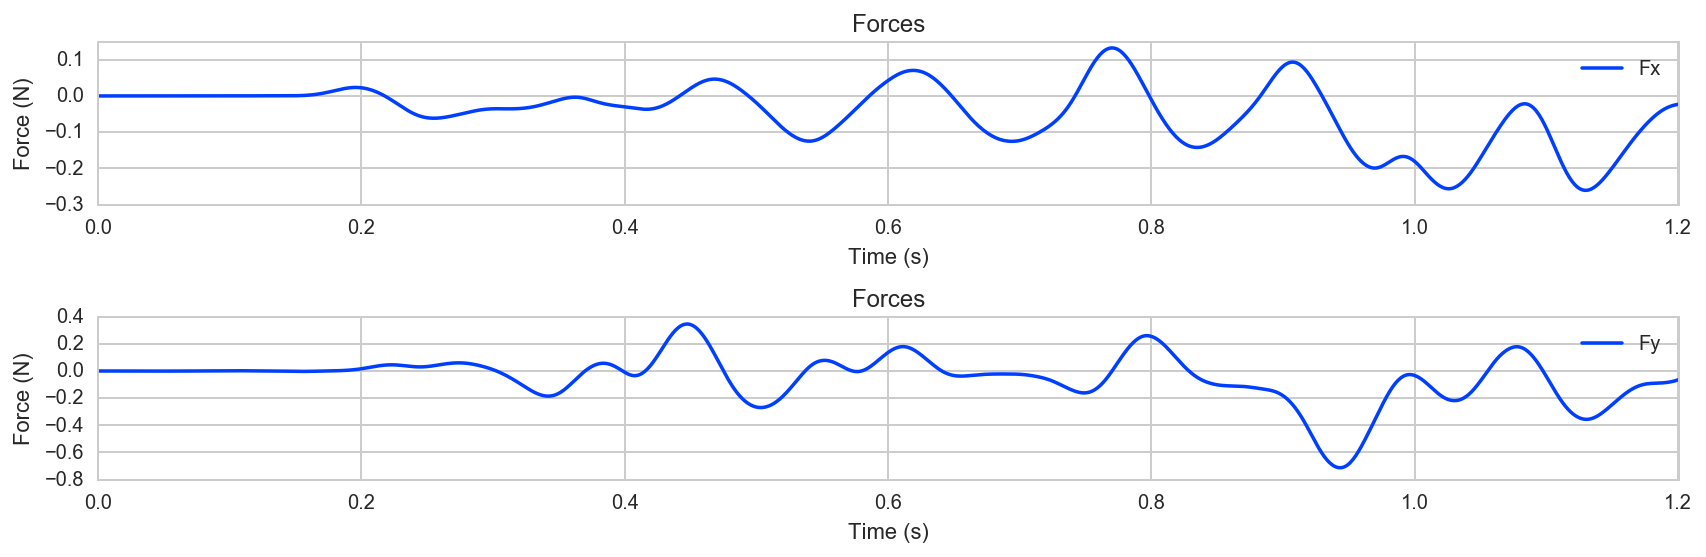

In [2]:
utils.plot_columns(df, ["Fx", "Fy"], display=True, save_figure=False)

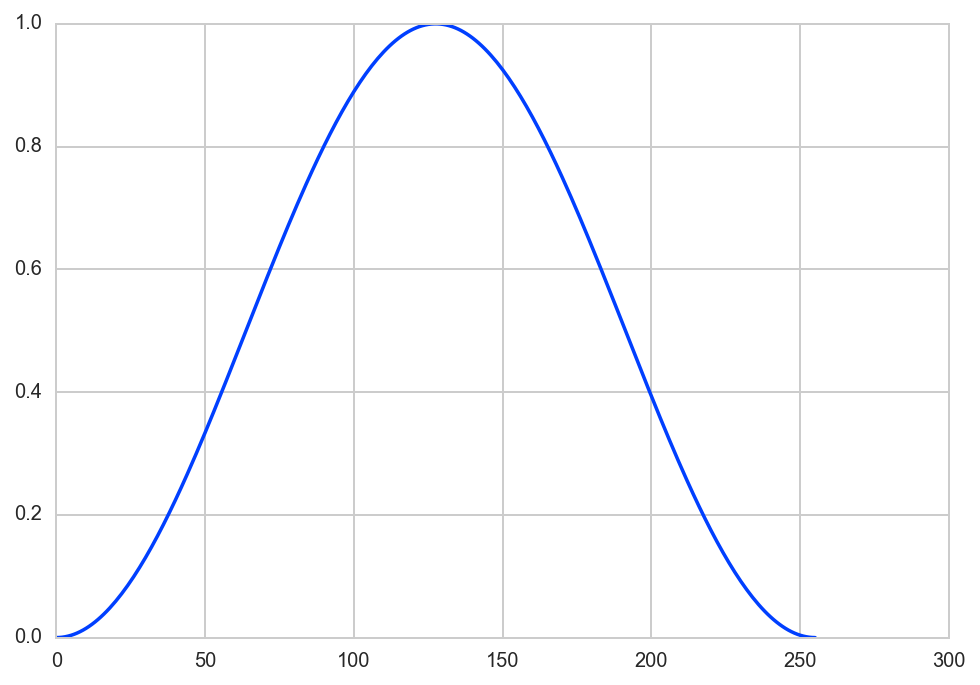

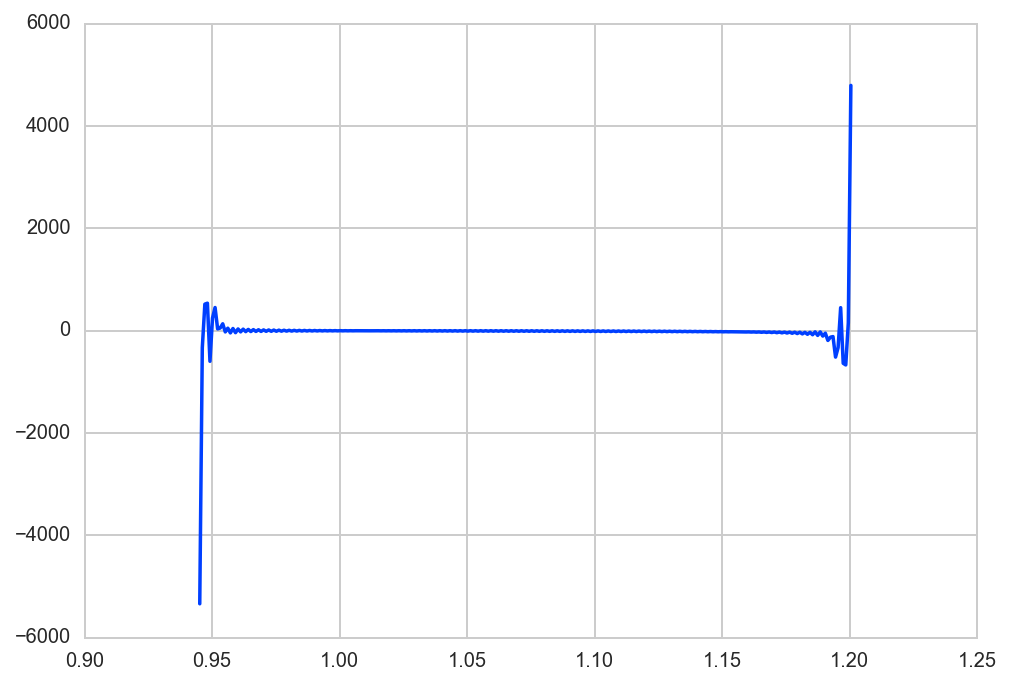

[ -4.02545721e+03  -2.04572484e+03  -1.72123510e+03  -1.44186275e+03
  -1.61131799e+03  -1.15660989e+03  -1.61650554e+03  -9.72601303e+02
  -1.62244088e+03  -8.40468562e+02  -1.61190563e+03  -7.40686238e+02
  -1.57829693e+03  -6.63931285e+02  -1.51814092e+03  -6.05374045e+02
  -1.42935154e+03  -5.62440776e+02  -1.31065564e+03  -5.33769933e+02
  -1.16145342e+03  -5.18691067e+02  -9.81806854e+02  -5.16874398e+02
  -7.72453516e+02  -5.28005550e+02  -5.35113392e+02  -5.51657475e+02
  -2.72785570e+02  -5.87191528e+02   1.02639511e+01  -6.33634700e+02
   3.08553592e+02  -6.89641651e+02   6.15501550e+02  -7.53567918e+02
   9.23793020e+02  -8.23568537e+02   1.22598557e+03  -8.97691129e+02
   1.51506964e+03  -9.74015713e+02   1.78495692e+03  -1.05076571e+03
   2.03088022e+03  -1.12637776e+03   2.24955971e+03  -1.19955208e+03
   2.43919090e+03  -1.26924830e+03   2.59927895e+03  -1.33476608e+03
   2.73044288e+03  -1.39591603e+03   2.83452656e+03  -1.45298155e+03
   2.91460241e+03  -1.50665176e+03

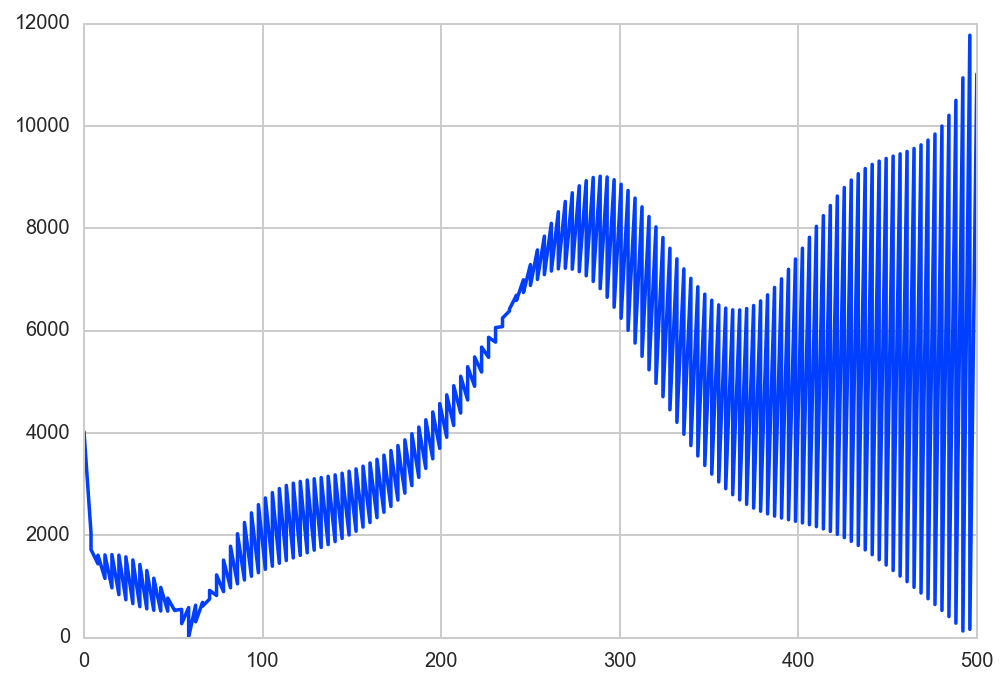

In [11]:
WINDOW_SIZE = 256
SAMPLING_FREQ = 1000.
SAMPLE_SPACING = 1. / SAMPLING_FREQ

w = signal.hanning(WINDOW_SIZE)
plt.plot(w)
plt.show()

data = df["Fx"][-WINDOW_SIZE:]
plt.plot(df["time"][-WINDOW_SIZE:], df["Fx"][-WINDOW_SIZE:])
plt.show()

sig_fft = fftpack.rfft(data)
n = sig_fft.size
freq = fftpack.rfftfreq(n, d=SAMPLE_SPACING)
print sig_fft
# freq = freq[range(WINDOW_SIZE/2)]
# sig_fft = sig_fft[range(WINDOW_SIZE/2)]
plt.plot(freq, np.abs(sig_fft))
plt.show()




[   0.         3.90625    7.8125    11.71875   15.625     19.53125
   23.4375    27.34375   31.25      35.15625   39.0625    42.96875   46.875
   50.78125   54.6875    58.59375   62.5       66.40625   70.3125
   74.21875   78.125     82.03125   85.9375    89.84375   93.75      97.65625
  101.5625   105.46875  109.375    113.28125  117.1875   121.09375  125.
  128.90625  132.8125   136.71875  140.625    144.53125  148.4375
  152.34375  156.25     160.15625  164.0625   167.96875  171.875    175.78125
  179.6875   183.59375  187.5      191.40625  195.3125   199.21875  203.125
  207.03125  210.9375   214.84375  218.75     222.65625  226.5625
  230.46875  234.375    238.28125  242.1875   246.09375  250.       253.90625
  257.8125   261.71875  265.625    269.53125  273.4375   277.34375  281.25
  285.15625  289.0625   292.96875  296.875    300.78125  304.6875
  308.59375  312.5      316.40625  320.3125   324.21875  328.125    332.03125
  335.9375   339.84375  343.75     347.65625  351.5625   

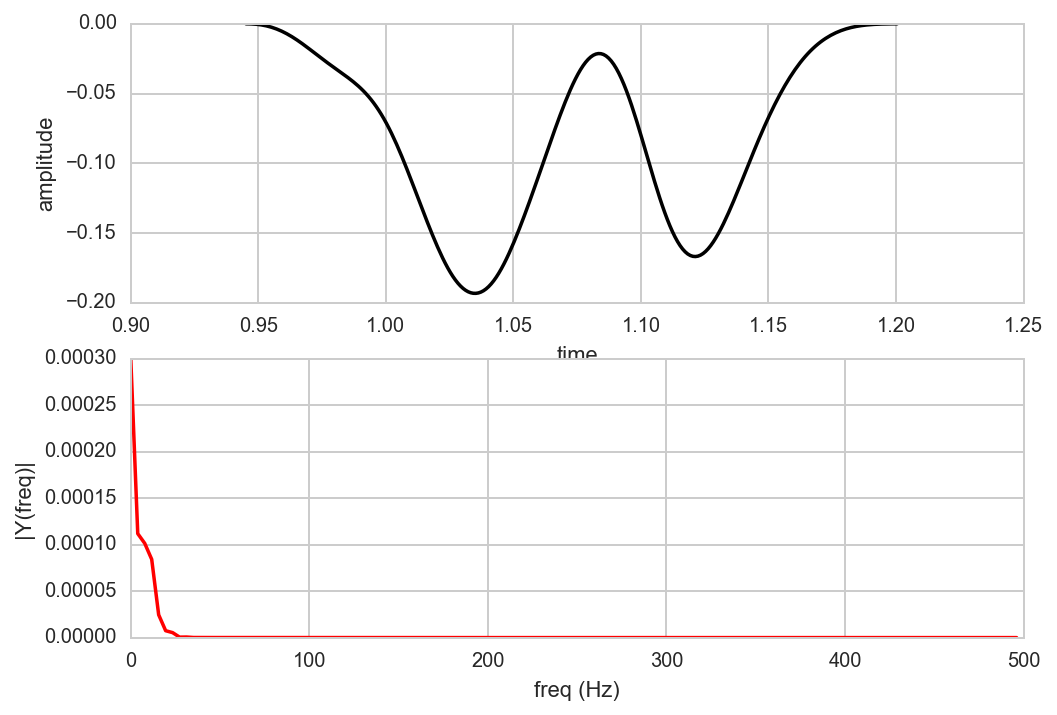

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

Fs = SAMPLING_FREQ                         # sampling rate
Ts = 1.0/Fs                      # sampling interval
t = df["time"][-256:]            # time vector

y = df["Fx"][-256:]

plt.subplot(2,1,1)
plt.plot(t,y * w,'k-')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(2,1,2)
n = len(y)                       # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
freq = frq[range(n/2)]           # one side frequency range
print freq

Y = np.fft.fft(y * w)/n              # fft computing and normalization
Y = Y[range(n/2)]

plt.plot(freq, abs(Y)/n, 'r-')
plt.xlabel('freq (Hz)')
plt.ylabel('|Y(freq)|')

plt.show()

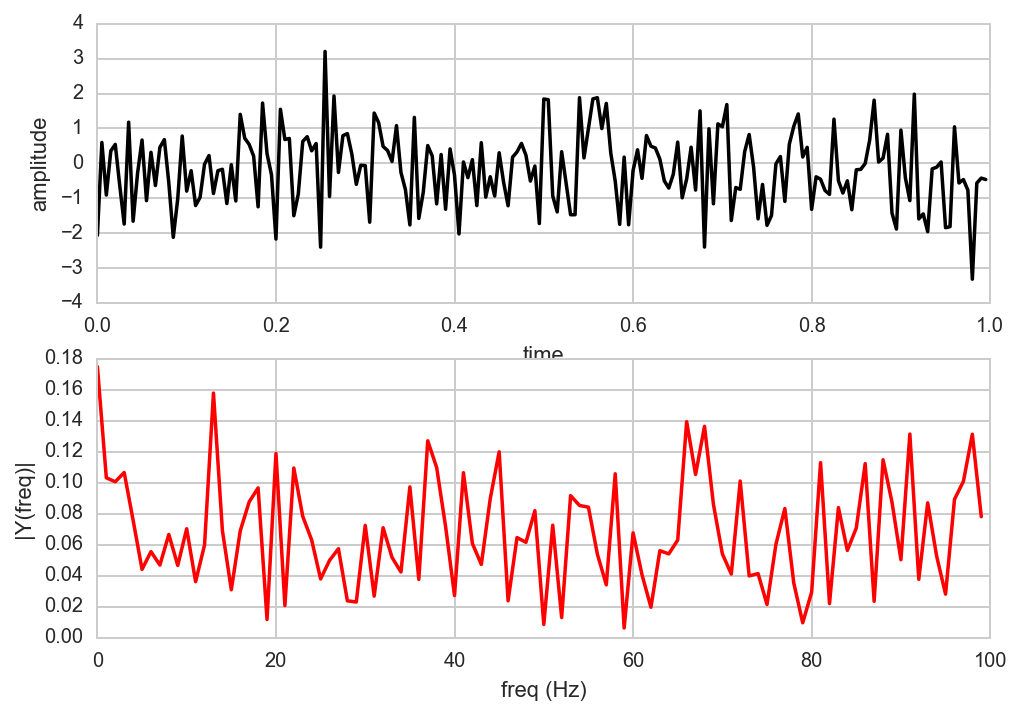

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

Fs = 200                         # sampling rate
Ts = 1.0/Fs                      # sampling interval
t = np.arange(0,1,Ts)            # time vector
ff = 5                           # frequency of the signal

y = np.random.randn(Fs)

plt.subplot(2,1,1)
plt.plot(t,y,'k-')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(2,1,2)
n = len(y)                       # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
freq = frq[range(n/2)]           # one side frequency range

Y = np.fft.fft(y)/n              # fft computing and normalization
Y = Y[range(n/2)]

plt.plot(freq, abs(Y), 'r-')
plt.xlabel('freq (Hz)')
plt.ylabel('|Y(freq)|')

plt.show()

[  1.50000000e+00 +7.10542736e-14j   1.52922862e+00 +1.20107805e-02j
   1.56250856e+00 +2.45458459e-02j   1.60027968e+00 +3.77126809e-02j
   1.64307596e+00 +5.16357422e-02j   1.69154766e+00 +6.64610887e-02j
   1.74649077e+00 +8.23624140e-02j   1.80888624e+00 +9.95490335e-02j
   1.87995329e+00 +1.18276636e-01j   1.96122262e+00 +1.38862009e-01j
   2.05463900e+00 +1.61703596e-01j   2.16270772e+00 +1.87310788e-01j
   2.28870832e+00 +2.16346634e-01j   2.43701487e+00 +2.49691773e-01j
   2.61358988e+00 +2.88543009e-01j   2.82677296e+00 +3.34570627e-01j
   3.08859155e+00 +3.90179851e-01j   3.41704730e+00 +4.58966831e-01j
   3.84034467e+00 +5.46561984e-01j   4.40530480e+00 +6.62307947e-01j
   5.19575092e+00 +8.22926102e-01j   6.37804673e+00 +1.06159805e+00j
   8.33584840e+00 +1.45483844e+00j   1.21968328e+01 +2.22753720e+00j
   2.33334526e+01 +4.45109414e+00j   3.90096009e+02 +7.75949206e+01j
  -2.57082221e+01 -5.32391686e+00j  -1.22647493e+01 -2.64053144e+00j
  -7.97745796e+00 -1.78317312e+00j

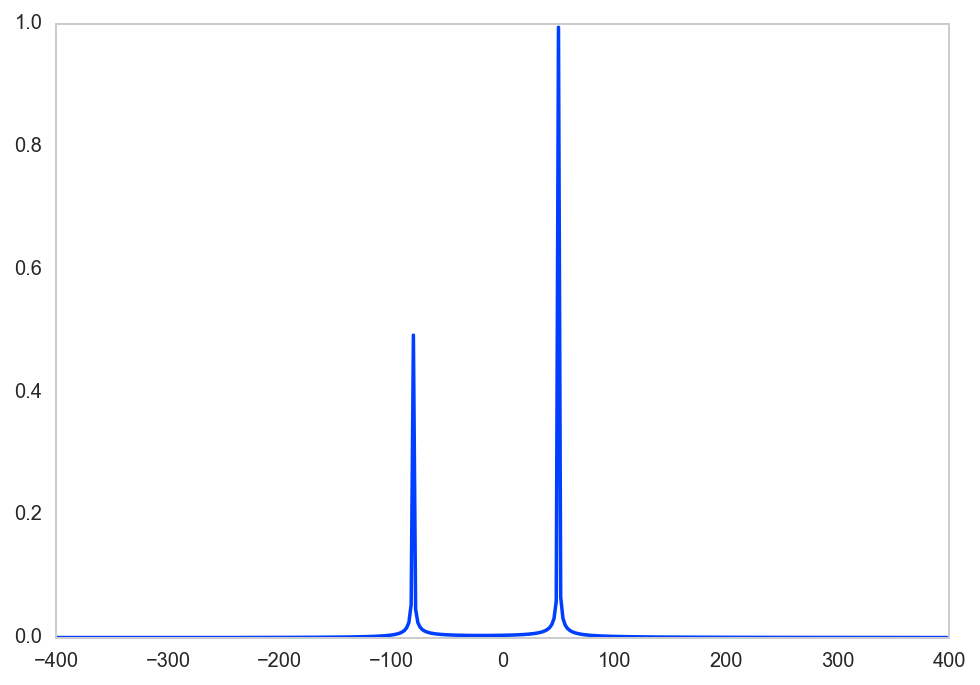

In [6]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
print yf
xf = fftfreq(N, T)
print xf
xf = fftshift(xf)
print xf
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

[ -6.48732488e-04 +0.00000000e+00j  -6.51467703e-04 -2.99522493e-06j
  -6.59730851e-04 -6.07300087e-06j  -6.73696712e-04 -9.31888363e-06j
  -6.93664293e-04 -1.28246065e-05j  -7.20068914e-04 -1.66916074e-05j
  -7.53500219e-04 -2.10351216e-05j  -7.94727325e-04 -2.59890999e-05j
  -8.44732875e-04 -3.17122972e-05j  -9.04758492e-04 -3.83959625e-05j
  -9.76365121e-04 -4.62737513e-05j  -1.06151317e-03 -5.56346769e-05j
  -1.16266938e-03 -6.68402790e-05j  -1.28295031e-03 -8.03476661e-05j
  -1.42631654e-03 -9.67408317e-05j  -1.59783832e-03 -1.16773748e-04j
  -1.80406315e-03 -1.41430456e-04j  -2.05353090e-03 -1.72010011e-04j
  -2.35750627e-03 -2.10248377e-04j  -2.73103657e-03 -2.58496141e-04j
  -3.19450613e-03 -3.19982191e-04j  -3.77596394e-03 -3.99212461e-04j
  -4.51468312e-03 -5.02585690e-04j  -5.46673071e-03 -6.39366558e-04j
  -6.71390835e-03 -8.23263387e-04j  -8.37851384e-03 -1.07505949e-03j
  -1.06484834e-02 -1.42714141e-03j  -1.38216974e-02 -1.93156458e-03j
  -1.83869525e-02 -2.67496245e-03j

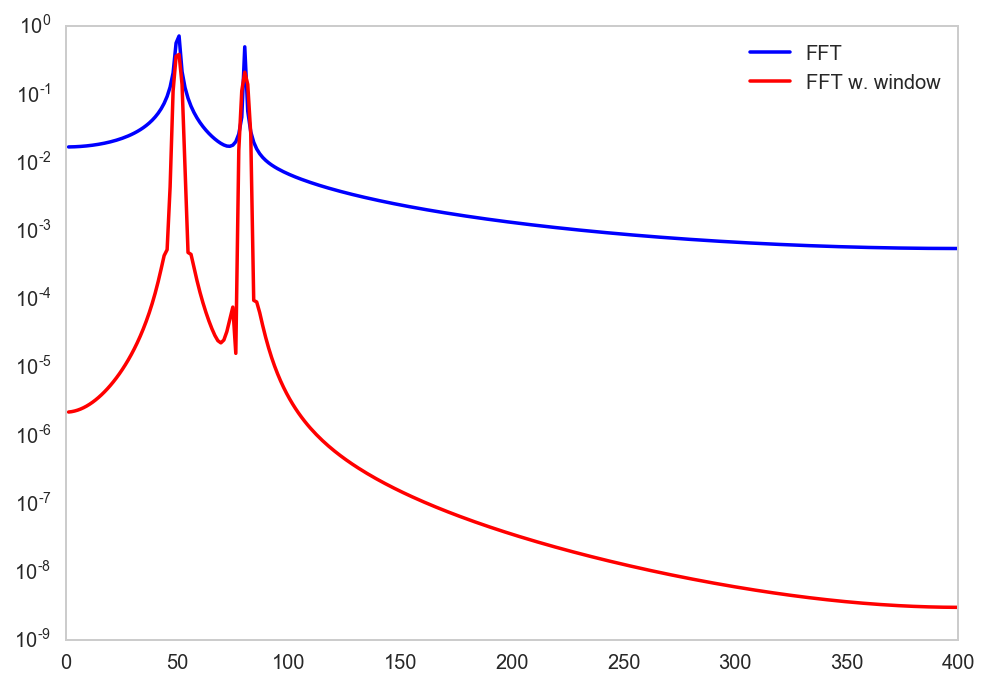

In [7]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
print ywf
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N/2], 2.0/N * np.abs(yf[1:N/2]), '-b')
plt.semilogy(xf[1:N/2], 2.0/N * np.abs(ywf[1:N/2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()